In [23]:
from sklearn.datasets import load_iris
import pandas as pd
import random
import numpy as np
iris = load_iris()
data = pd.DataFrame(iris.data)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = pd.DataFrame(iris.target)
target = target.rename(columns = {0: 'target'})
df = pd.concat([data, target], axis = 1)


In [24]:
lengthMf = df.groupby('sepal_length')['target'].agg(lambda x: x.value_counts().idxmax()).T
lengthF = df.groupby('sepal_length')['target'].agg(lambda x: x.value_counts().max()).T
lengthFreq = pd.concat([lengthF.rename('frequency'),lengthMf.rename('most_frequent')], axis=1)

widthMf = df.groupby('sepal_width')['target'].agg(lambda x: x.value_counts().idxmax()).T
widthF = df.groupby('sepal_width')['target'].agg(lambda x: x.value_counts().max()).T
widthFreq = pd.concat([lengthF.rename('frequency'),lengthMf.rename('most_frequent')], axis=1)

# Display the final result
lengthFreq.head()

,frequency,most_frequent
sepal_length,,
4.3,1,0
4.4,3,0
4.5,1,0
4.6,4,0
4.7,2,0


In [25]:
widthFreq.head()

,frequency,most_frequent
sepal_length,,
4.3,1,0
4.4,3,0
4.5,1,0
4.6,4,0
4.7,2,0


In [26]:
M = pd.DataFrame(index=df['sepal_length'].unique(), columns=df['sepal_width'].unique())

for i in M.index:
	for j in M.columns:
		lmf = lengthMf.loc[i].astype(int)
		wmf = widthMf.loc[j].astype(int)
		lf = lengthF.loc[i].astype(int)
		wf = widthF.loc[j].astype(int)
		if lmf != wmf:
			M.loc[i,j]=max(lmf,wmf)
		elif lf == wf:
			M.loc[i,j]=random.choice([lmf, wmf])
		elif lf < wf:
			M.loc[i,j]=wmf
		else:
			M.loc[i,j]=lmf

M.head()

,3.5,3.0,3.2,3.1,3.6,3.9,3.4,2.9,3.7,4.0,...,4.1,4.2,2.3,2.8,2.4,2.7,2.0,2.2,2.5,2.6
5.1,0,2,0,0,0,0,0,1,0,0,...,0,0,1,2,1,1,1,1,1,1
4.9,0,2,0,0,0,0,0,1,0,0,...,0,0,1,2,1,1,1,1,1,1
4.7,0,2,0,0,0,0,0,1,0,0,...,0,0,1,2,1,1,1,1,1,1
4.6,0,2,0,0,0,0,0,1,0,0,...,0,0,1,2,1,1,1,1,1,1
5.0,0,2,0,0,0,0,0,1,0,0,...,0,0,1,2,1,1,1,1,1,1


In [27]:
correct = 0
for sample in df.values:
	l = sample[0]
	w = sample[1]
	if M.loc[l,w] == sample[4]:
		correct+=1
print(f'Score:{round(correct/M.size * 100,4)}%')

Score:13.1677%


In [28]:
from sklearn.model_selection import train_test_split
from sklearn import tree

xtrain,xtest,ytrain,ytest = train_test_split(iris.data,iris.target,random_state=0)

clf = tree.DecisionTreeClassifier(random_state=0)

clf.fit(xtrain,ytrain)

yhat = clf.predict(xtest)

count = 0
Mtest = len(ytest)
for i in range(Mtest):
    if (yhat[i]==ytest[i]):
        count+=1
score = (count/Mtest)*100
print(f'Number of correct  predictions = {count}/{Mtest} = {round(score,4)}%')
print(f'Train score = {clf.score(xtrain,ytrain)}, Test score = {round(clf.score(xtest,ytest),4)}')


Number of correct  predictions = 37/38 = 97.3684%
Train score = 1.0, Test score = 0.9737


Accuracy score=0.9736842105263158


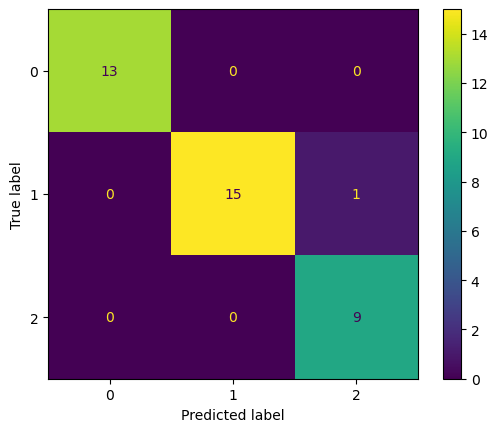

Prediction scores [1.  1.  0.9]
Recall scores [1.     0.9375 1.    ]
f1 scores [1.         0.96774194 0.94736842]


In [29]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(f'Accuracy score={metrics.accuracy_score(ytest,yhat)}')

cm = metrics.confusion_matrix(ytest,yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

pre = metrics.precision_score(ytest,yhat,average=None)
print(f'Prediction scores {pre}')

recall = metrics.recall_score(ytest,yhat,average=None)
print(f'Recall scores {recall}')

f1 = metrics.f1_score(ytest,yhat,average=None)
print(f'f1 scores {f1}')


In [30]:
decisionPath = clf.decision_path(iris.data)
# print(decisionPath)
tree.export_graphviz(clf,out_file='iris-tree.dot',class_names=iris.target_names,impurity=True)

[[5.8 2.8]
 [6.  2.2]
 [5.5 4.2]
 [7.3 2.9]
 [5.  3.4]
 [6.3 3.3]
 [5.  3.5]
 [6.7 3.1]
 [6.8 2.8]
 [6.1 2.8]
 [6.1 2.6]
 [6.4 3.2]
 [6.1 2.8]
 [6.5 2.8]
 [6.1 2.9]
 [4.9 3.6]
 [6.  2.9]
 [5.5 2.6]
 [4.8 3. ]
 [5.4 3.9]
 [5.6 2.8]
 [5.6 3. ]
 [4.8 3.4]
 [4.4 2.9]
 [6.2 2.8]
 [4.6 3.6]
 [5.1 3.8]
 [6.2 2.9]
 [5.  2.3]
 [5.  3.4]
 [6.4 3.1]
 [5.4 3. ]
 [5.2 3.5]
 [6.1 3. ]
 [6.4 2.8]
 [5.2 2.7]
 [5.7 3.8]
 [6.  2.7]]


Train score = 0.8392857142857143, Test score = 0.7895
Accuracy score=0.7894736842105263


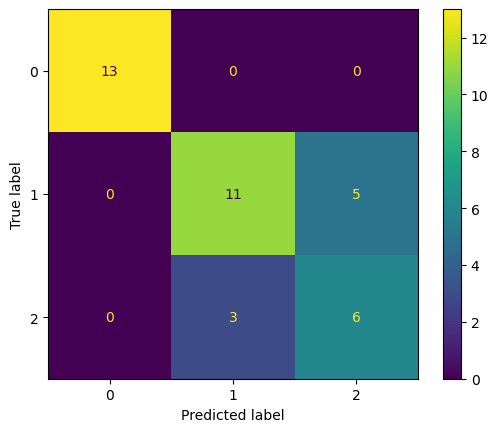

Prediction scores [1.         0.78571429 0.54545455]
Recall scores [1.         0.6875     0.66666667]
f1 scores [1.         0.73333333 0.6       ]


In [31]:
# Logistic Regression on iris dataset
import sklearn.linear_model as linear_model

xtrain,xtest,ytrain,ytest = train_test_split(iris.data[:,:2],iris.target,random_state=0)

print(xtest)

lr = linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial')
lr.fit(xtrain,ytrain)

yhat = lr.predict(xtest)

print(f'Train score = {lr.score(xtrain,ytrain)}, Test score = {round(lr.score(xtest,ytest),4)}')

print(f'Accuracy score={metrics.accuracy_score(ytest,yhat)}')

cm = metrics.confusion_matrix(ytest,yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

pre = metrics.precision_score(ytest,yhat,average=None)
print(f'Prediction scores {pre}')

recall = metrics.recall_score(ytest,yhat,average=None)
print(f'Recall scores {recall}')

f1 = metrics.f1_score(ytest,yhat,average=None)
print(f'f1 scores {f1}')

TypeError: Dimensions of C (241, 380) should be one smaller than X(380) and Y(241) while using shading='flat' see help(pcolormesh)

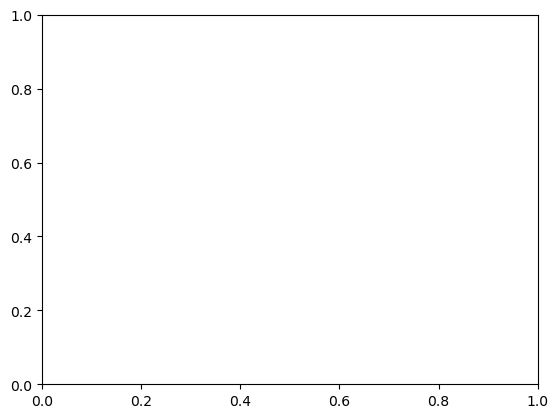

In [32]:
x0range = np.arange(4.2,8,0.01)
x1range = np.arange(2,4.4,0.01)
x0,x1=np.meshgrid(x0range,x1range)
xpairs = np.column_stack((x0.ravel(), x1.ravel()))
yhatpairs = lr.predict(xpairs)
yhatmesh = yhatpairs.reshape(x0.shape)

fig, ax = plt.subplots()

# Plot colormesh
pcm = ax.pcolormesh(x0, x1, yhatmesh, shading='flat', cmap='Blues')

# Plot scatter on the same axes
scatter = ax.scatter(xtest[:, 0], xtest[:, 1], c=yhat, cmap='viridis')

# Show the plot
plt.show()

0
1
2


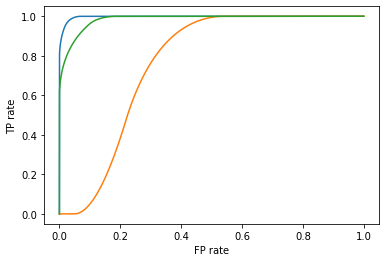

In [ ]:
import sklearn.preprocessing as preprocess

conf = lr.decision_function(xpairs)

ybin = preprocess.label_binarize(yhatpairs,classes=sorted(set(iris.target)))

fpr = dict()
tpr = dict()
for c in range(3):
    print(c)
    fpr[c],tpr[c],tmp = metrics.roc_curve(ybin[:,c],conf[:,c])

for c in range(3):
    plt.plot(fpr[c],tpr[c],label=iris.target_names[c])

plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.show()